**Click on File and save a copy in Drive.**

### **Aim**  
The motive of this assignment is to make predictions using **Linear Regression**. To make sure you truly understand how the underlying algorithm works, you are to implement it from scratch.

### Generating the dataset  
Run the cell below to create the dataset. It further splits the available data into training and testing. Please do not edit this cell.


In [ ]:
! pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

### Visualizing the data  
Use `matplotlib` to visualize the given data.

In [ ]:
print(X.shape)
print(y.shape)

(100, 1)
(100,)


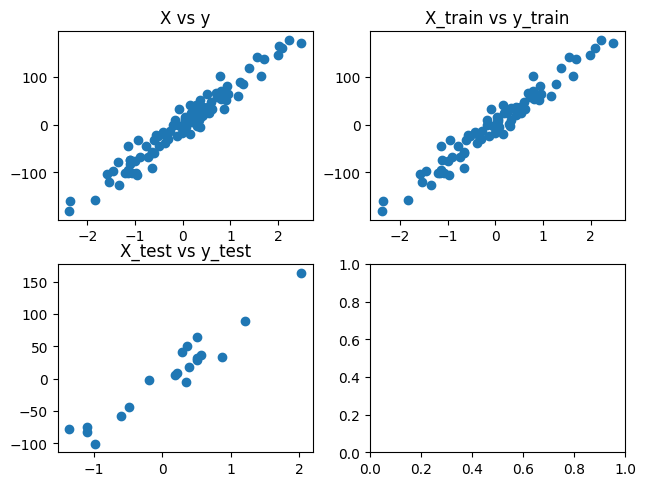

In [ ]:
import matplotlib.pyplot as plt

# Your code here
figure, axis = plt.subplots(2, 2)
figure.tight_layout()
axis[0, 0].scatter(X, y)
axis[0, 0].set_title("X vs y")


axis[0, 1].scatter(X_train, y_train)
axis[0, 1].set_title("X_train vs y_train")


axis[1, 0].scatter(X_test, y_test)
axis[1, 0].set_title("X_test vs y_test")

# Combine all the operations and display
plt.show()

You should be able to see the linear relations between `y` and the features in vector `X`.

### Gradient Descent Review  
1. ####  Cost function
Define the `cost function` to measure the difference between predictions and target outputs. Here, we are working with first degree polynomial, so derivatives are easy to calculate. ( Linear function `y = wx +b` )  

$$Error = \frac{1}{N}\sum_{i=1}^N (y_i - \overline{y}_i)^2 = \frac{1}{N}\sum_{i=1}^N (y_i - (xw+b))^2 $$  

  where `N` is the number of samples  
    


2. #### Compute the derivative
$$\frac{\delta Error}{\delta w} = \frac{2}{N}\sum_{i=1}^N -x(y_i -(m  x +b ))  $$
$$\frac{\delta Error}{\delta b} = \frac{2}{N}\sum_{i=1}^N -(y_i -(m  x +b ))  $$
3. <h4>Update current parameters</h4>
$$ w:= w- learning\_rate \cdot \frac{\delta Error}{\delta w}   $$
$$ b:= b- learning\_rate \cdot \frac{\delta Error}{\delta b}   $$
4. <h4>Repeat until it fits good enough</h4>


### Model definition

Complete the functions in the class below. Hints provided at appropriate places.

In [ ]:
import numpy as np

class LinearRegression:

    # The __init__ is called when we make any object of our class. Here, you are to specify the default values for
    # Learning Rate, Number of Iterations, Weights and Biases. It doesn't return anything.
    # Hint: Google what a `self pointer` is and figure out how it can be used here.
    def __init__(self, learning_rate=0.001, n_iters=1000):
        # Your code here
        self.l_rate = learning_rate
        self.n_iters = n_iters
        self.W= None
        self.b= None


    # The following function would be the heart of the model. This is where the training would happen.
    # You're supposed to iterate and keep on updating the weights and biases according to the steps of Gradient Descent.
    def fit(self, X, y):
        # Gradient Descent code goes here
        x_1, x_2 = X.shape
        self.weights = np.zeros(x_2)
        self.bias = 0


        for i in range(self.n_iters):
            y_pred=np.dot(X,self.weights) + self.bias
            dw = (2/x_1)*np.dot(X.T,(y_pred-y))
            db = (2/x_1)*np.sum(y_pred - y)

            self.weights = self.weights - self.l_rate*dw
            self.bias = self.bias-self.l_rate*db






    # This function will be called after our model has been trained and we are predicting on unseen data
    # What is our prediction? Just return that
    def predict(self, X):
      y_calc = np.dot(X,self.weights) + self.bias
      return y_calc





### Initializing, Training & Predictions

In [ ]:
# Now, we make an object of our custom class.
#regressor = LinearRegression()
regressor = LinearRegression(learning_rate=0.001, n_iters=1000)


# Call the fit method on the object to train (pass appropriate part of dataset)
regressor.fit(X_train, y_train)

# Now, let's see our what our model predicts
# pass appropriate part of dataset
predictions = regressor.predict(X_test)


### Evaluate the model   

Return [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error) & [R2 Score](https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html#:~:text=%C2%AFy) from the functions below.

In [ ]:
from sklearn.metrics import r2_score
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true-y_pred)**2)





def r2score(y_true, y_pred):

    return r2_score(y_true,y_pred)

    # return the r2 score



mse =  mean_squared_error(y_test, predictions)
print("MSE:", mse)

  # Pass appropriate parts of dataset
print("Accuracy:", r2score(y_test, predictions))

MSE: 361.2812896055198
Accuracy: 0.9110916693605722


[Please click on this link to access subjective questions](https://docs.google.com/document/d/1ty9m1vUoPNh_WU8qATznTKukukkSwOlnLJazhBFmWO4/edit?usp=sharing)